## Hoeffding inequality
 - run a simulation for flipping 1000 virtual coins
 - flip each 10 times
 - focus on three coins: 
     - c_1, the first coin flipped
     - c_rand, a coin chosen randomly from the 1000
     - c_min, the coin with the minimum frequency of heads
 - let v_1, v_rand, and v_min be the fraction of heads (out of 10 tosses) obtained for the 3 coins respectively
 - run the experiment 100,000 times to get a full distribution of v_1, v_rand, and v_min

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
def run(n=10):
    prop = lambda x: x / float(n)
    data = {'v_1': None, 'v_rand': None, 'v_min': None}
    rng = np.random.default_rng()
    sample = rng.binomial(n=n, p=0.5, size=1000)
    rando = rng.choice(sample)
    minimum = np.amin(sample)
    return (prop(sample[0]), prop(rando), prop(minimum))

In [5]:
run()

(0.5, 0.1, 0.1)

In [22]:
iterations = 100000
firsts = []
randos = []
mins = []
for i in range(iterations):
    a, b, c = run()
    firsts.append(a)
    randos.append(b)
    mins.append(c)


In [23]:
print(f"min: {np.array(mins).mean()}\nfirst: {np.array(firsts).mean()}\nrandom: {np.array(randos).mean()}")

min: 0.037655
first: 0.5000560000000001
random: 0.499695


## Error and Noise

## Linear Regression


In [128]:
def choose_points(n, seed):
    rng = np.random.default_rng(seed=seed)
    return (rng.random((n,2)) * 2) - 1


def choose_line(seed):
    rng = np.random.default_rng(seed=seed)
    r = (rng.random(4) * 2) - 1
    l = {'x1': r[0], 'y1': r[1], 'x2': r[2], 'y2': r[3]}
#     print('Points')
#     print(l)
    m = (l['y2'] - l['y1']) / (l['x2'] - l['x1'])
    b = l['y1'] - (m * l['x1'])
    line = {"m": m, "b": b}
#     print('Eq')
#     print(line)
    return(line)


def assign_y(point, target_fxn):
    """ 
    Determine whether the point is +1 or -1, 
    depending on whether it's to the right or left of the line
    """
    is_right = ((target_fxn['m'] * point[0]) + target_fxn['b']) < point[1]
    if is_right:
        return 1
    else:
        return -1


def make_target_function(target_fxn):
    """
    should return a function that takes only a point
    """
    def assign_y(point):
        is_right = ((target_fxn['m'] * point[0]) + target_fxn['b']) < point[1]
        if is_right:
            return 1
        else:
            return -1
    return assign_y


def initialize_data(seed, point_count):
    points = choose_points(point_count, seed=seed)
    target_fxn = choose_line(seed=seed+1)
    fxn = make_target_function(target_fxn)
    Y_output = np.apply_along_axis(fxn, 1, points)
    return points, Y_output, target_fxn

Points
{'x1': 0.3878661613147285, 'y1': 0.28291644175646113, 'x2': -0.7427115513647276, 'y2': -0.7725838997373413}
Eq
{'m': 0.9335937986892373, 'b': -0.07919300116836875}


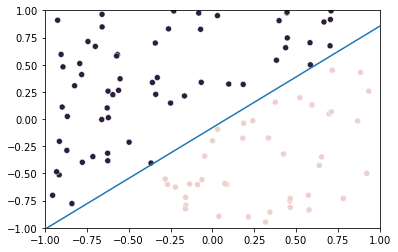

In [34]:
seed = 22
point_count = 100

points, Y_output, target_fxn = initialize_data(seed=seed, point_count=point_count)

sns.scatterplot(x=points.transpose()[0], y=points.transpose()[1], hue=Y_output)
sns.lineplot(x=line_x, y=(target_fxn['m'] * line_x) + target_fxn['b'])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend([],[], frameon=False)


In [138]:
np.linalg.pinv(points) @ Y_output


def add_dummy_col(points):
    dummy = np.ones((points.shape[0],1))
    return np.hstack((dummy, points))    




In [72]:
points.shape

(100, 2)

In [120]:
def classification(weight_vector, point):
    """ the classification of a point given the weight vector and the point """
    # add a dummy variable to the point vector, which should be the same length as the weight vector
    x_vector = np.array([1] + list(point))
    value = np.inner(weight_vector, x_vector)
#     value = np.inner(weight_vector, point)
    return np.sign(value)

[-0.86539968  0.15245969  0.43517796]


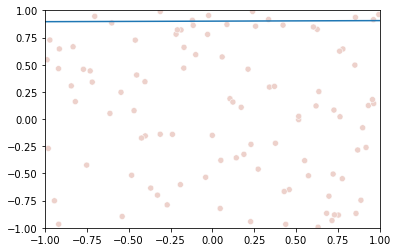

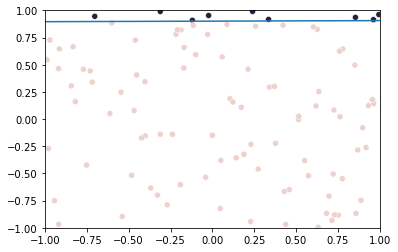

[0.65787852 0.33575438 0.81144839]


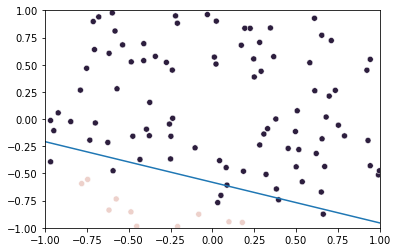

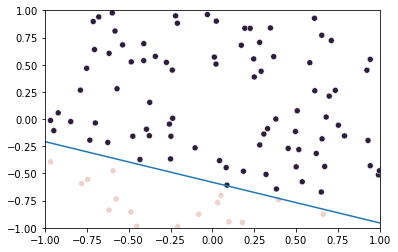

[ 0.08536774 -0.43416613  1.41883243]


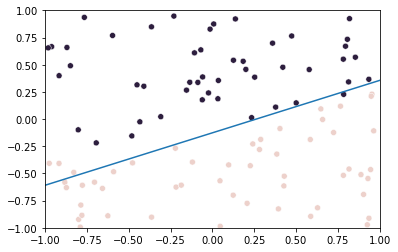

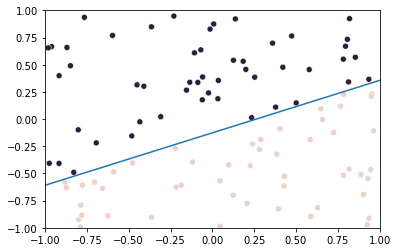

[-0.92603475  0.2525637   0.05465491]


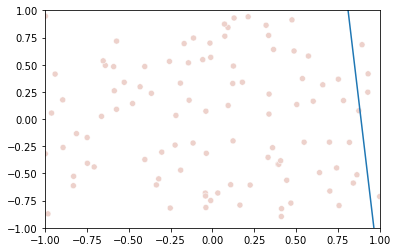

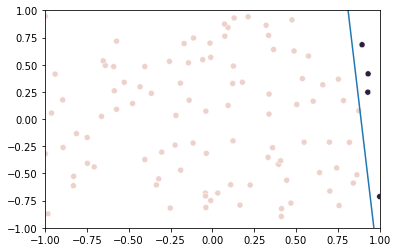

[ 0.25572908 -1.28852861  0.5576325 ]


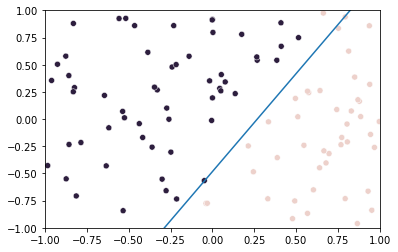

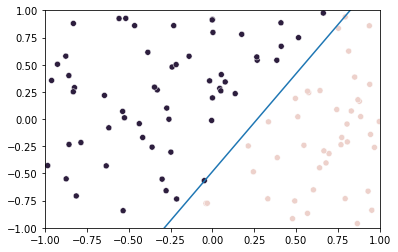

[0.23281898 0.19092547 1.3678547 ]


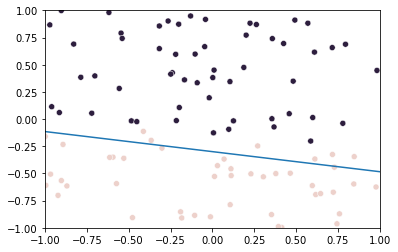

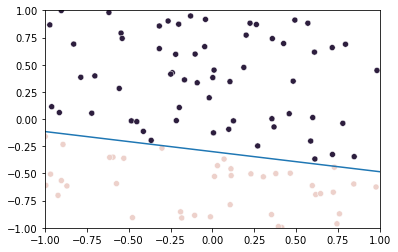

[-0.35261072  1.26092013  0.27949094]


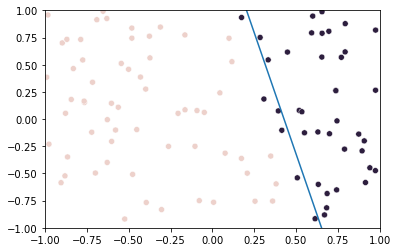

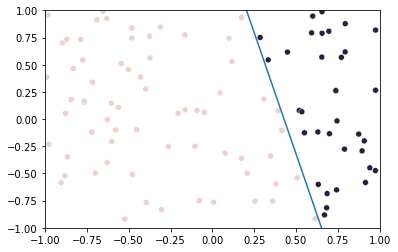

[-0.4149125  -1.24067595  0.0781805 ]


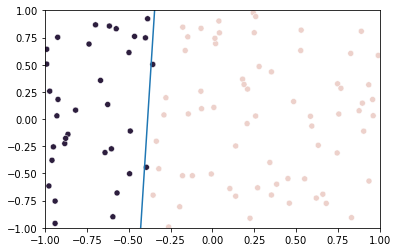

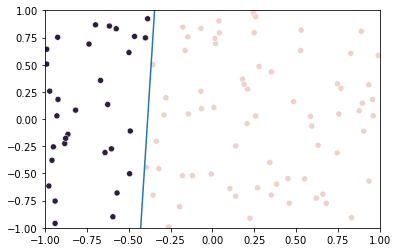

[-0.49325915  0.97848233  0.44796481]


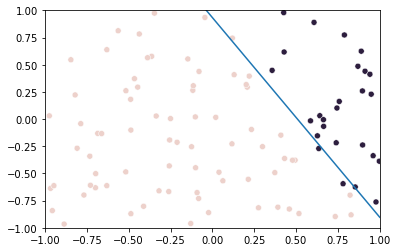

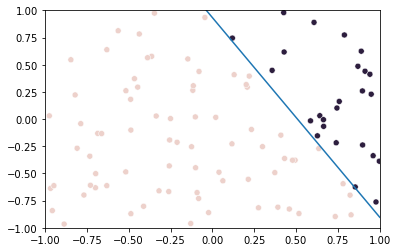

[ 0.89582423 -0.17471077  0.2476348 ]


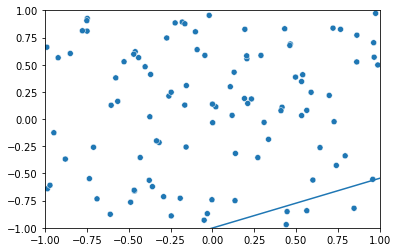

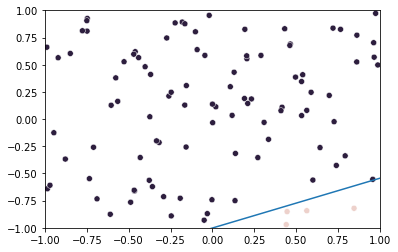

In [140]:
# Linear regression algorithm (~39 minutes into Lecture 3)
# minimimzing E_in

def iteration(seed):
    points, Y_output, target_fxn = initialize_data(seed=seed, point_count=point_count)
    w = np.linalg.pinv(add_dummy_col(points)) @ Y_output
#     w = np.linalg.pinv(points) @ Y_output
    print(w)
    prediction = []
    for point in points:
        prediction.append(classification(w, point))
    sns.scatterplot(x=points.transpose()[0], y=points.transpose()[1], hue=prediction)
    sns.lineplot(x=line_x, y=(target_fxn['m'] * line_x) + target_fxn['b'])
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.legend([],[], frameon=False)
    plt.show()
    sns.scatterplot(x=points.transpose()[0], y=points.transpose()[1], hue=Y_output)
    sns.lineplot(x=line_x, y=(target_fxn['m'] * line_x) + target_fxn['b'])
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.legend([],[], frameon=False)
    plt.show()

for i in range(10):
    iteration(i)

<AxesSubplot:ylabel='Count'>

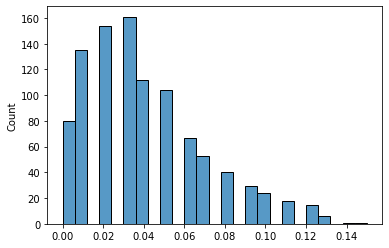

In [135]:
def iteration(seed):
    points, Y_output, target_fxn = initialize_data(seed=seed, point_count=point_count)
    w = np.linalg.pinv(add_dummy_col(points)) @ Y_output
    predictions = []
    errors = []
    for point, y in zip(points, Y_output):
        pred = classification(w, point)
        predictions.append(pred)
        if pred != y:
            errors.append(1)
        else:
            errors.append(0)
#     print(np.asarray(errors).mean())
#     sns.scatterplot(x=points.transpose()[0], y=points.transpose()[1], hue=predictions)
#     sns.lineplot(x=line_x, y=(target_fxn['m'] * line_x) + target_fxn['b'])
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
#     plt.legend([],[], frameon=False)
#     plt.show()
    return np.asarray(errors).mean()

errors = []
for i in range(1000):
    errors.append(iteration(i))

sns.histplot(errors, bins=25)